# 2.2 - The Multilayer Perceptron

Course's materials require a `tensorflow` version lower than the default one used in Google Colab. Run the following cell to downgrade TensorFlow accordingly.

In [ ]:
import os
def downgrade_tf_version():
    os.system("!yes | pip uninstall -y tensorflow")
    os.system("!yes | pip install tensorflow==2.12.0")
    os.kill(os.getpid(), 9)
downgrade_tf_version()

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

## Classifying Fashion-MNIST

You will have to create a classification model for the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) dataset, a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network.

In [1]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Let's see a random sample

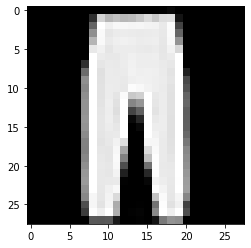

In [4]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[0],:,:], cmap='gray');

Preparing the data for a training process...

In [5]:
from tensorflow.keras import utils 
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

## Define the network architecture using keras

### Sequential models

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

or

In [7]:
del model
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

**Assignment**: Take a look to the core layers in keras: https://keras.io/layers/core/ and the set of basic parameters https://keras.io/layers/about-keras-layers/

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Once the arquictecture of model has been defined, the next step is to set the loss function and optimizer

In [8]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='sgd')

from tensorflow.keras import optimizers
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Remember the definition of cross entropy:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)$$

The categorical cross entropy can be defined as:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} \log p_{model}[y_i \in C_j]$$

The term ${\bf{1}}_{y_i \in C_j}$ is the indicator function of the $i$-th observation belonging to the $j$-th category. The $p_{model}[y_i \in C_j]$ is the probability predicted by the model for the $i$-th observation to belong to the $j$-th category. When there are more than two categories, the neural network outputs a vector of $C$ probabilities, each giving the probability that the network input should be classified as belonging to the respective category. When the number of categories is just two, the neural network outputs a single probability $\hat{y}_i$, with the other one being $1$ minus the output. This is why the binary cross entropy looks a bit different from categorical cross entropy, despite being a special case of it. 

**Note**. If insteat of a multi-class problem we would be facing a multi-label classification problem, the activation function of the last layer must be a **sigmoid** and the loss function **binary_crossentropy**.

Take a look to compile and fit parameters https://keras.io/models/model/#compile

In [9]:
print("Training...")
model.train_on_batch(X_trainN, y_trainOHE)

print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)

Training...
Generating test predictions...


real class
9


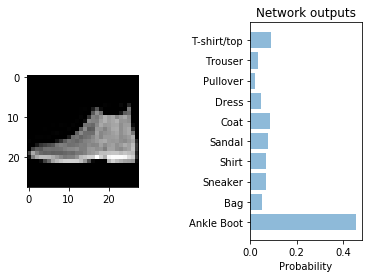

In [10]:
print('real class')
print(y_test[0])

objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122) 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

In [11]:
print("Training...")
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Training...
Epoch 1/10
3375/3375 - 3s - loss: 0.4584 - val_loss: 0.3974
Epoch 2/10
3375/3375 - 3s - loss: 0.3689 - val_loss: 0.3629
Epoch 3/10
3375/3375 - 3s - loss: 0.3356 - val_loss: 0.3612
Epoch 4/10
3375/3375 - 3s - loss: 0.3134 - val_loss: 0.3628
Epoch 5/10
3375/3375 - 3s - loss: 0.2997 - val_loss: 0.3581
Epoch 6/10
3375/3375 - 3s - loss: 0.2891 - val_loss: 0.3596
Epoch 7/10
3375/3375 - 3s - loss: 0.2752 - val_loss: 0.3610
Epoch 8/10
3375/3375 - 3s - loss: 0.2639 - val_loss: 0.3649
Epoch 9/10
3375/3375 - 3s - loss: 0.2530 - val_loss: 0.3540
Epoch 10/10
3375/3375 - 3s - loss: 0.2488 - val_loss: 0.3601


Generating test predictions...


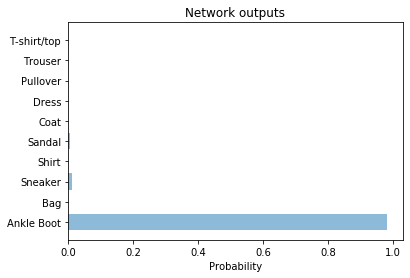

In [12]:
print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
 
plt.show()

In [14]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  86.28 %


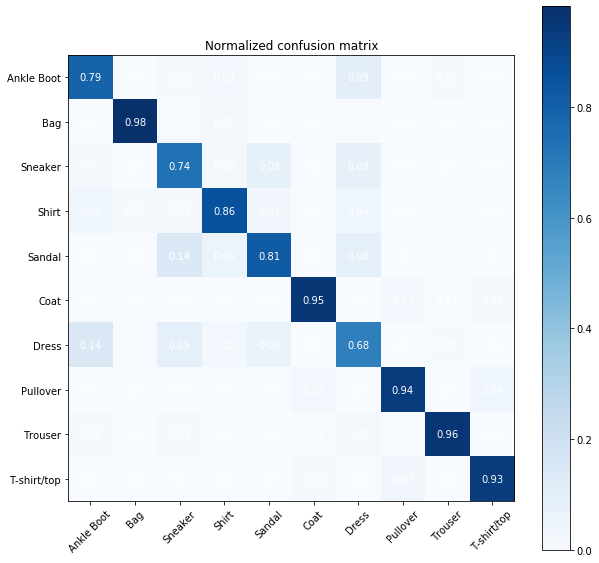

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm = cm/np.sum(cm,axis=0)
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);

### Functional models

The Keras functional API provides a more flexible way for defining models.

It allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

In [16]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 2s - loss: 0.5539 - accuracy: 0.8146 - val_loss: 0.4231 - val_accuracy: 0.8475
Epoch 2/10
3375/3375 - 2s - loss: 0.3926 - accuracy: 0.8629 - val_loss: 0.3830 - val_accuracy: 0.8618
Epoch 3/10
3375/3375 - 2s - loss: 0.3512 - accuracy: 0.8766 - val_loss: 0.3649 - val_accuracy: 0.8645
Epoch 4/10
3375/3375 - 2s - loss: 0.3252 - accuracy: 0.8855 - val_loss: 0.3528 - val_accuracy: 0.8707
Epoch 5/10
3375/3375 - 2s - loss: 0.3051 - accuracy: 0.8923 - val_loss: 0.3482 - val_accuracy: 0.8745
Epoch 6/10
3375/3375 - 2s - loss: 0.2879 - accuracy: 0.8971 - val_loss: 0.3460 - val_accuracy: 0.8720
Epoch 7/10
3375/3375 - 2s - loss: 0.2745 - accuracy: 0.9026 - val_loss: 0.3456 - val_accuracy: 0.8753
Epoch 8/10
3375/3375 - 2s - loss: 0.2616 - accuracy: 0.9074 - val_loss: 0.3482 - val_accuracy: 0.8778
Epoch 9/10
3375/3375 - 2s - loss: 0.2496 - accuracy: 0.9118 - val_loss: 0.3409 - val_accuracy: 0.8765
Epoch 10/10
3375/3375 - 2s - loss: 0.2393 - accuracy: 0.9157 - val_loss: 0.3454 - 

In [19]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.41 %


**Note**. Take a look to the keras functional API available on https://keras.io/getting-started/functional-api-guide/

### Defining a model by subclassing the Model class
In this way we use inherintance from class Model to define the nwe model. It requires two methods the constructor init, where you should define your layers, and the forward pass in call.

In [26]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh)
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

model = MyModel()

In [31]:
import tensorflow as tf

class MyModel2(tf.keras.Model):
    def __init__(self):
        super(MyModel2, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh)
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)
        self.dropout = tf.keras.layers.Dropout(0.5)
        
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        if training:
            x = self.dropout(x, training=training)
        return self.dense3(x)

model2 = MyModel2()

In [32]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
tf.keras.backend.set_floatx('float32')
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 3s - loss: 0.2287 - accuracy: 0.9198 - val_loss: 0.3338 - val_accuracy: 0.8860
Epoch 2/10
54000/54000 - 3s - loss: 0.2202 - accuracy: 0.9224 - val_loss: 0.3324 - val_accuracy: 0.8840
Epoch 3/10
54000/54000 - 3s - loss: 0.2111 - accuracy: 0.9251 - val_loss: 0.3315 - val_accuracy: 0.8852
Epoch 4/10
54000/54000 - 3s - loss: 0.2030 - accuracy: 0.9294 - val_loss: 0.3412 - val_accuracy: 0.8863
Epoch 5/10
54000/54000 - 3s - loss: 0.1966 - accuracy: 0.9319 - val_loss: 0.3390 - val_accuracy: 0.8850
Epoch 6/10
54000/54000 - 3s - loss: 0.1889 - accuracy: 0.9354 - val_loss: 0.3478 - val_accuracy: 0.8803
Epoch 7/10
54000/54000 - 3s - loss: 0.1821 - accuracy: 0.9371 - val_loss: 0.3393 - val_accuracy: 0.8855
Epoch 8/10
54000/54000 - 3s - loss: 0.1744 - accuracy: 0.9404 - val_loss: 0.3485 - val_accuracy: 0.8840
Epoch 9/10
54000/54000 - 3s - loss: 0.1706 - accuracy: 0.9412 - val_loss: 0.3565 - val_accuracy: 0.8813
Epoch 10/10
540